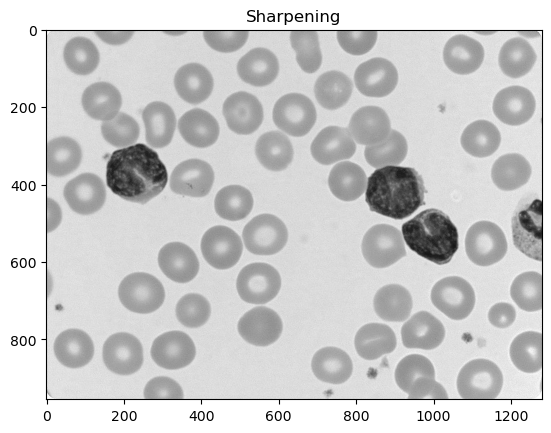

In [4]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

# Load the image 
image1 = cv2.imread('F1.jpg') 
b = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
# plt.subplot(1, 2, 1) 
# plt.title("Original") 
# plt.imshow(b,cmap=plt.cm.gray) 
kernel1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])          # Create the sharpening kernel

sharpened_image1 = cv2.filter2D(b, -1, kernel1)                    # Sharpen the image 
cv2.imwrite('sharpened_image1.jpg', sharpened_image1)              # Save the image 

# plt.subplot(1, 2, 2) 
plt.title("Sharpening") 
plt.imshow(sharpened_image1,cmap=plt.cm.gray) 
plt.show()


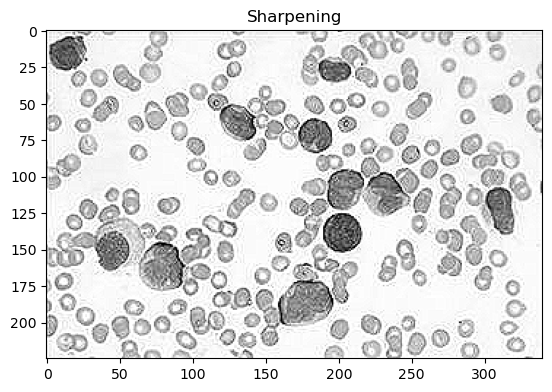

In [5]:
image2 = cv2.imread('F2.jpg') 
c = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
# plt.subplot(1, 2, 1) 
# plt.title("Original") 
plt.imshow(c,cmap=plt.cm.gray)
kernel2=np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 

sharpened_image2=cv2.filter2D(c, -1, kernel2) 
cv2.imwrite('sharpened_image2.jpg',sharpened_image2) 

# plt.subplot(1, 2, 2) 
plt.title("Sharpening") 
plt.imshow(sharpened_image2,cmap=plt.cm.gray) 
plt.show()

**FUZZY K MEANS**

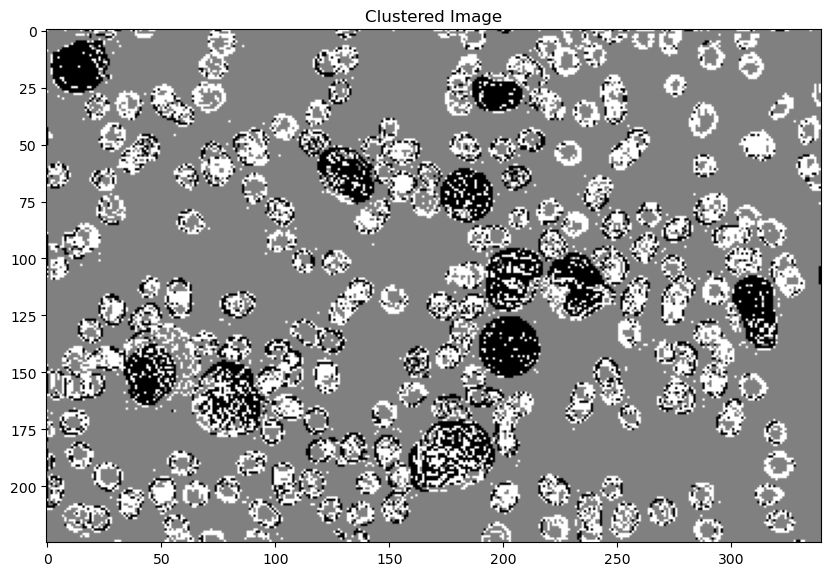

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('sharpened_image2.jpg', cv2.IMREAD_GRAYSCALE)
img_float = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).flatten()
c = 3
# Set the convergence threshold and maximum number of iterations
eps = 0.1
iter_count = 100

# Set the random seed
np.random.seed(0)

# Generate the labels and centers
ret, labels, centers = cv2.kmeans(img_float, c, None, (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, iter_count, eps), 10, cv2.KMEANS_RANDOM_CENTERS)
image_labels = labels.reshape(img.shape)
plt.figure(figsize=(10, 10))
plt.imshow(image_labels, cmap='gray')
plt.title('Clustered Image')
plt.show()


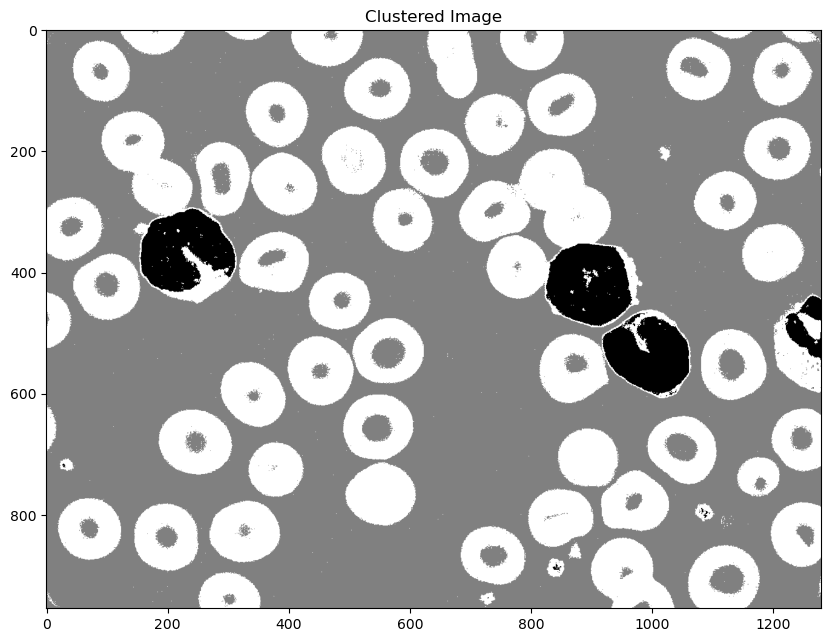

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('sharpened_image1.jpg', cv2.IMREAD_GRAYSCALE)
img_float = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).flatten()
c = 3
eps = 0.1
iter_count = 100
np.random.seed(0)
ret, labels, centers = cv2.kmeans(img_float, c, None, (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, iter_count, eps), 10, cv2.KMEANS_RANDOM_CENTERS)
image_labels = labels.reshape(img.shape)
plt.figure(figsize=(10, 10))


plt.imshow(image_labels, cmap='gray')
plt.title('Clustered Image')
plt.show()


SIFT: SIFT (Scale Invariant Feature Transform) Detector is used in the detection of interest points on an input image. It allows the identification of localized features in images which is essential in applications 
 

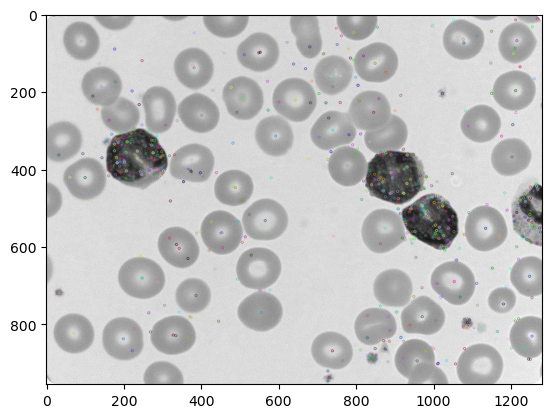

In [6]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('sharpened_image1.jpg')                
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()                                        # Initialize the SIFT detector
keypoints, descriptors = sift.detectAndCompute(gray, None)      # Detect the keypoints and compute the descriptors
img_with_keypoints = cv2.drawKeypoints(gray, keypoints, img)    # Draw the keypoints on the image
cv2.imwrite('cluster_image1.jpg',img_with_keypoints) 
plt.imshow(img_with_keypoints)                                  # Display the image with keypoints
plt.show()


In [7]:
import pandas as pd
from PIL import Image

In [8]:
colourImg = Image.open("cluster_image1.jpg")
colourPixels = colourImg.convert("RGB")
colourArray = np.array(colourPixels.getdata()).reshape(colourImg.size + (3,))
A = colourArray

# Create the multiindex we'll need for the series
index = pd.MultiIndex.from_product(
    (*map(range, A.shape[:2]), ('r', 'g', 'b')),
    names=('row', 'col', None)
)

# Can be chained but separated for use in explanation
df = pd.Series(A.flatten(), index=index)
df = df.unstack()
df = df.reset_index().reindex(columns=['col', 'row', 'r', 'g', 'b'])
df
import pandas as pd
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4
0,0.000000,0.0,1.0,1.0,1.0
1,0.001048,0.0,1.0,1.0,1.0
2,0.002096,0.0,1.0,1.0,1.0
3,0.003145,0.0,1.0,1.0,1.0
4,0.004193,0.0,1.0,1.0,1.0
...,...,...,...,...,...
1222395,0.995807,1.0,1.0,1.0,1.0
1222396,0.996855,1.0,1.0,1.0,1.0
1222397,0.997904,1.0,1.0,1.0,1.0
1222398,0.998952,1.0,1.0,1.0,1.0


**Linear Regression, Decision tree and RandomForestRegression**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

x=df.loc[0:50,[0,1,4]]
y=df.loc[0:50,3]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3) 

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain1=sc.fit_transform(xtrain)
xtest1=sc.fit_transform(xtest)

lr=LinearRegression()
lr.fit(xtrain1,ytrain)        
predict_train=lr.predict(xtrain1)
predict_test=lr.predict(xtest1)

print("R2-Score of training:",r2_score(ytrain,predict_train))
print("MSE of training:", mean_squared_error(ytrain, predict_train))
print("R2-Score of testing:",r2_score(ytest,predict_test))
print("MSE of testing:", mean_squared_error(ytest, predict_test))


R2-Score of training: 0.9892221221989017
MSE of training: 0.00011598071857798682
R2-Score of testing: 0.4692425076725354
MSE of testing: 0.0022905624188296007


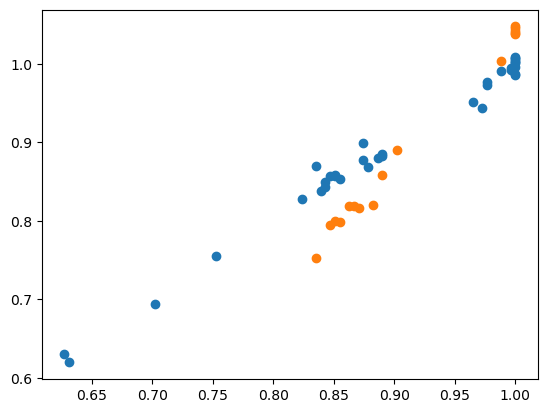

In [10]:
plt.scatter(ytrain,predict_train)
plt.scatter(ytest,predict_test)
plt.show()

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dtc= DecisionTreeRegressor()
dtc=DecisionTreeRegressor(criterion="friedman_mse",max_depth=5)
dtc.fit(xtrain1,ytrain)

train_result=dtc.predict(xtrain1)
test_result=dtc.predict(xtest1)
print("Training Accuracy: ",r2_score(ytrain,train_result))
print("MSE of training:", mean_squared_error(ytrain, predict_train))
print("Testing Accuracy: ",r2_score(ytest,test_result))
print("MSE of testing:", mean_squared_error(ytest, predict_test))

Training Accuracy:  0.9994827965695025
MSE of training: 0.00011598071857798682
Testing Accuracy:  0.7935412026726054
MSE of testing: 0.0022905624188296007


[Text(0.5576923076923077, 0.9166666666666666, 'x[2] <= 0.211\nfriedman_mse = 0.011\nsamples = 35\nvalue = 0.899'), Text(0.3076923076923077, 0.75, 'x[0] <= 0.006\nfriedman_mse = 0.006\nsamples = 19\nvalue = 0.821'), Text(0.15384615384615385, 0.5833333333333334, 'x[2] <= -2.487\nfriedman_mse = 0.003\nsamples = 4\nvalue = 0.678'), Text(0.07692307692307693, 0.4166666666666667, 'x[2] <= -2.862\nfriedman_mse = 0.0\nsamples = 2\nvalue = 0.629'), Text(0.038461538461538464, 0.25, 'friedman_mse = 0.0\nsamples = 1\nvalue = 0.631'), Text(0.11538461538461539, 0.25, 'friedman_mse = 0.0\nsamples = 1\nvalue = 0.627'), Text(0.23076923076923078, 0.4166666666666667, 'x[0] <= -0.382\nfriedman_mse = 0.001\nsamples = 2\nvalue = 0.727'), Text(0.19230769230769232, 0.25, 'friedman_mse = 0.0\nsamples = 1\nvalue = 0.702'), Text(0.2692307692307692, 0.25, 'friedman_mse = 0.0\nsamples = 1\nvalue = 0.753'), Text(0.46153846153846156, 0.5833333333333334, 'x[2] <= -0.179\nfriedman_mse = 0.0\nsamples = 15\nvalue = 0.859

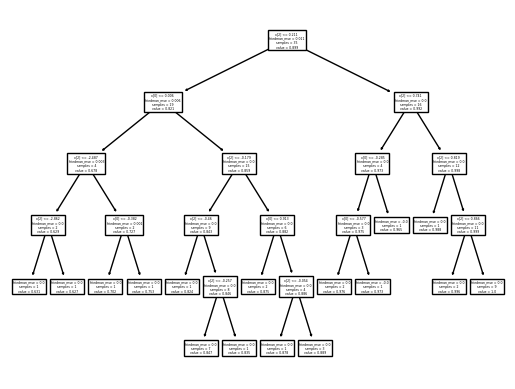

In [12]:
print(tree.plot_tree(dtc))

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
 
regressor.fit(xtrain1,ytrain)
pred_train4=regressor.predict(xtrain1)
pred_test4=regressor.predict(xtest1)
print("R2-Score of training:",r2_score(ytrain,pred_train4))
print("MSE of training:", mean_squared_error(ytrain, pred_train4))
print("R2-Score of testing:",r2_score(ytest,pred_test4))
print("MSE of testing:", mean_squared_error(ytest, pred_test4))

R2-Score of training: 0.9894298590484546
MSE of training: 0.00011374526281100643
R2-Score of testing: 0.7799799554565694
MSE of testing: 0.0009495290272971968


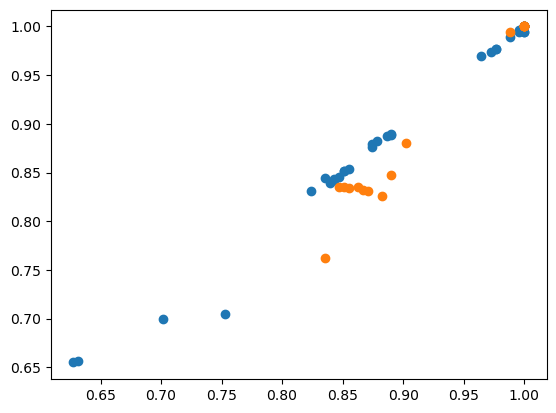

In [14]:
import matplotlib.pyplot as plt
plt.scatter(ytrain,pred_train4)
plt.scatter(ytest,pred_test4)

plt.show()

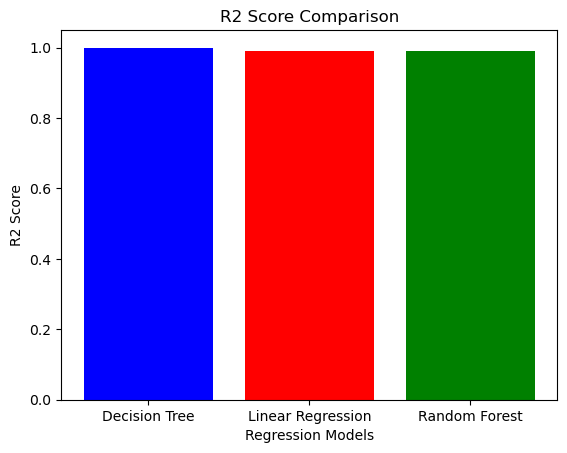

In [16]:
import matplotlib.pyplot as plt

mse_v=[r2_score(ytrain,train_result),r2_score(ytrain,predict_train) , r2_score(ytrain,pred_train4)]
mo=['Decision Tree','Linear Regression', 'Random Forest']

plt.bar(mo, mse_v, color=['blue', 'red', 'green'])

plt.xlabel('Regression Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')

plt.show()